In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
from metroscore.network_builder import *
from shapely.geometry import Point, LineString

%config InlineBackend.figure_format = 'retina'

In [3]:
G = build_road_network(region="Beacon, NY")

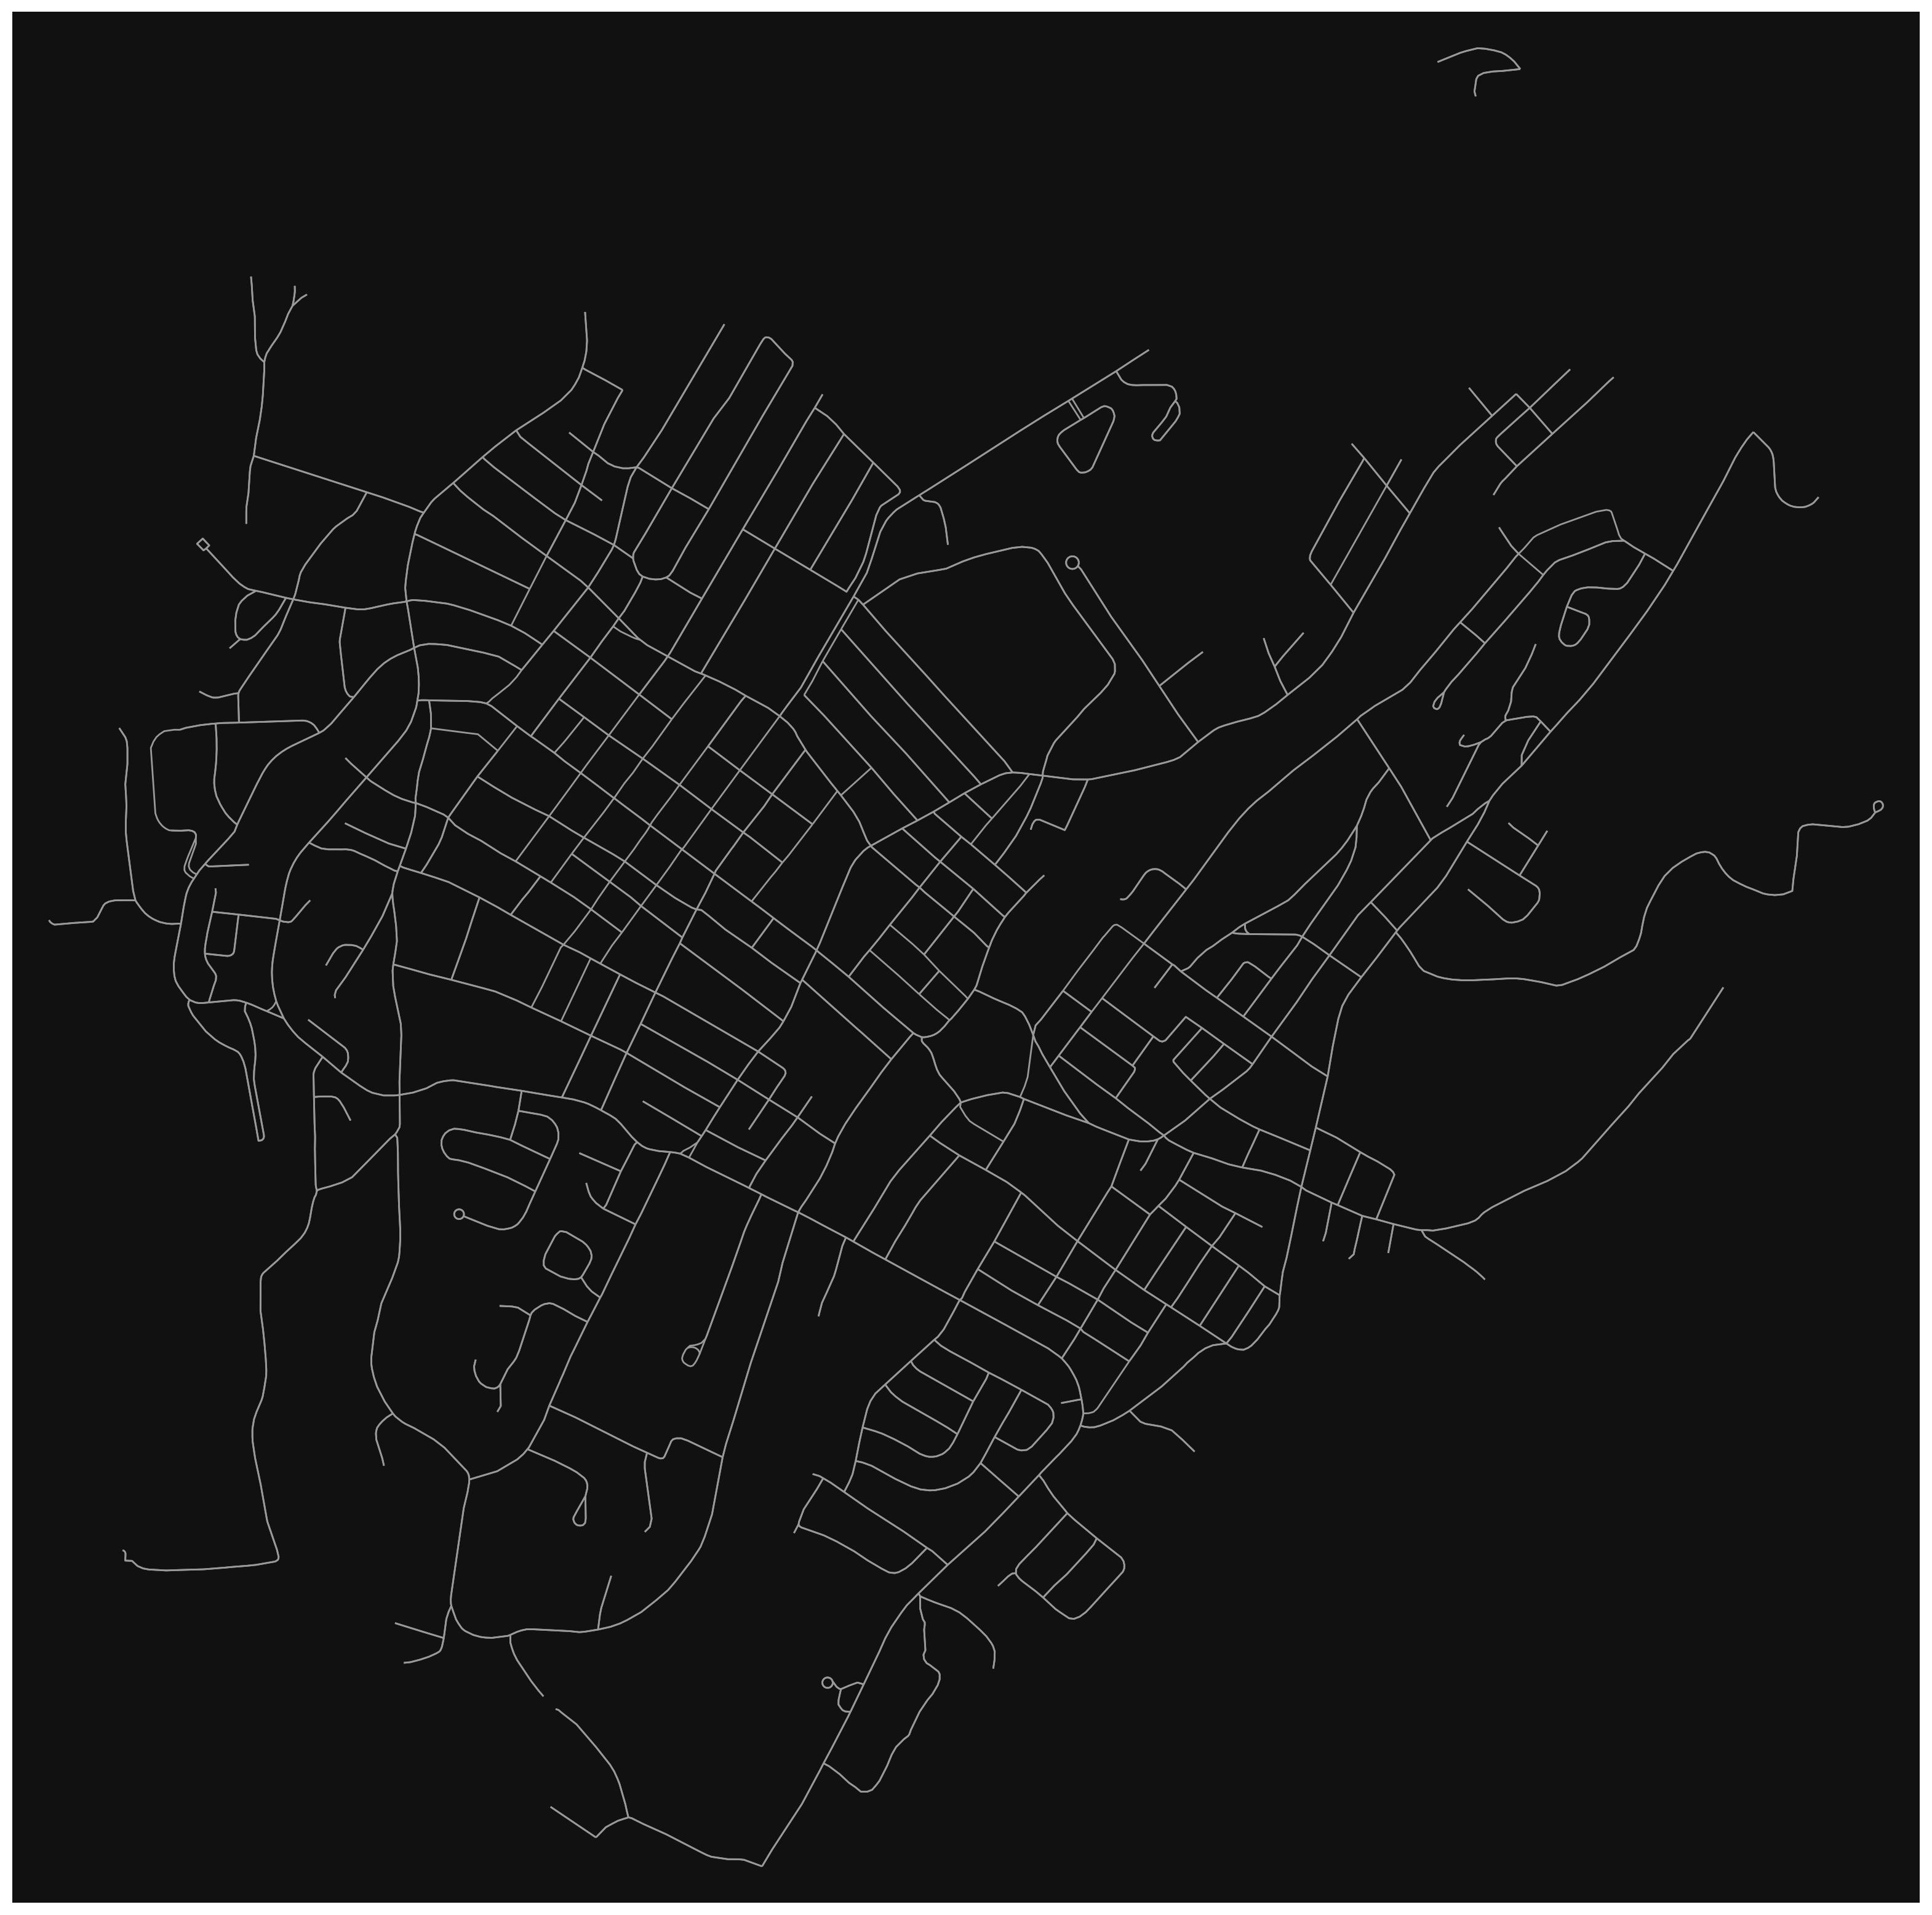

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [4]:
ox.plot.plot_graph(G, figsize=(20,20), node_size=0)

In [5]:
W = ox.graph_from_place(query="Beacon, NY", network_type="bike", retain_all=True)

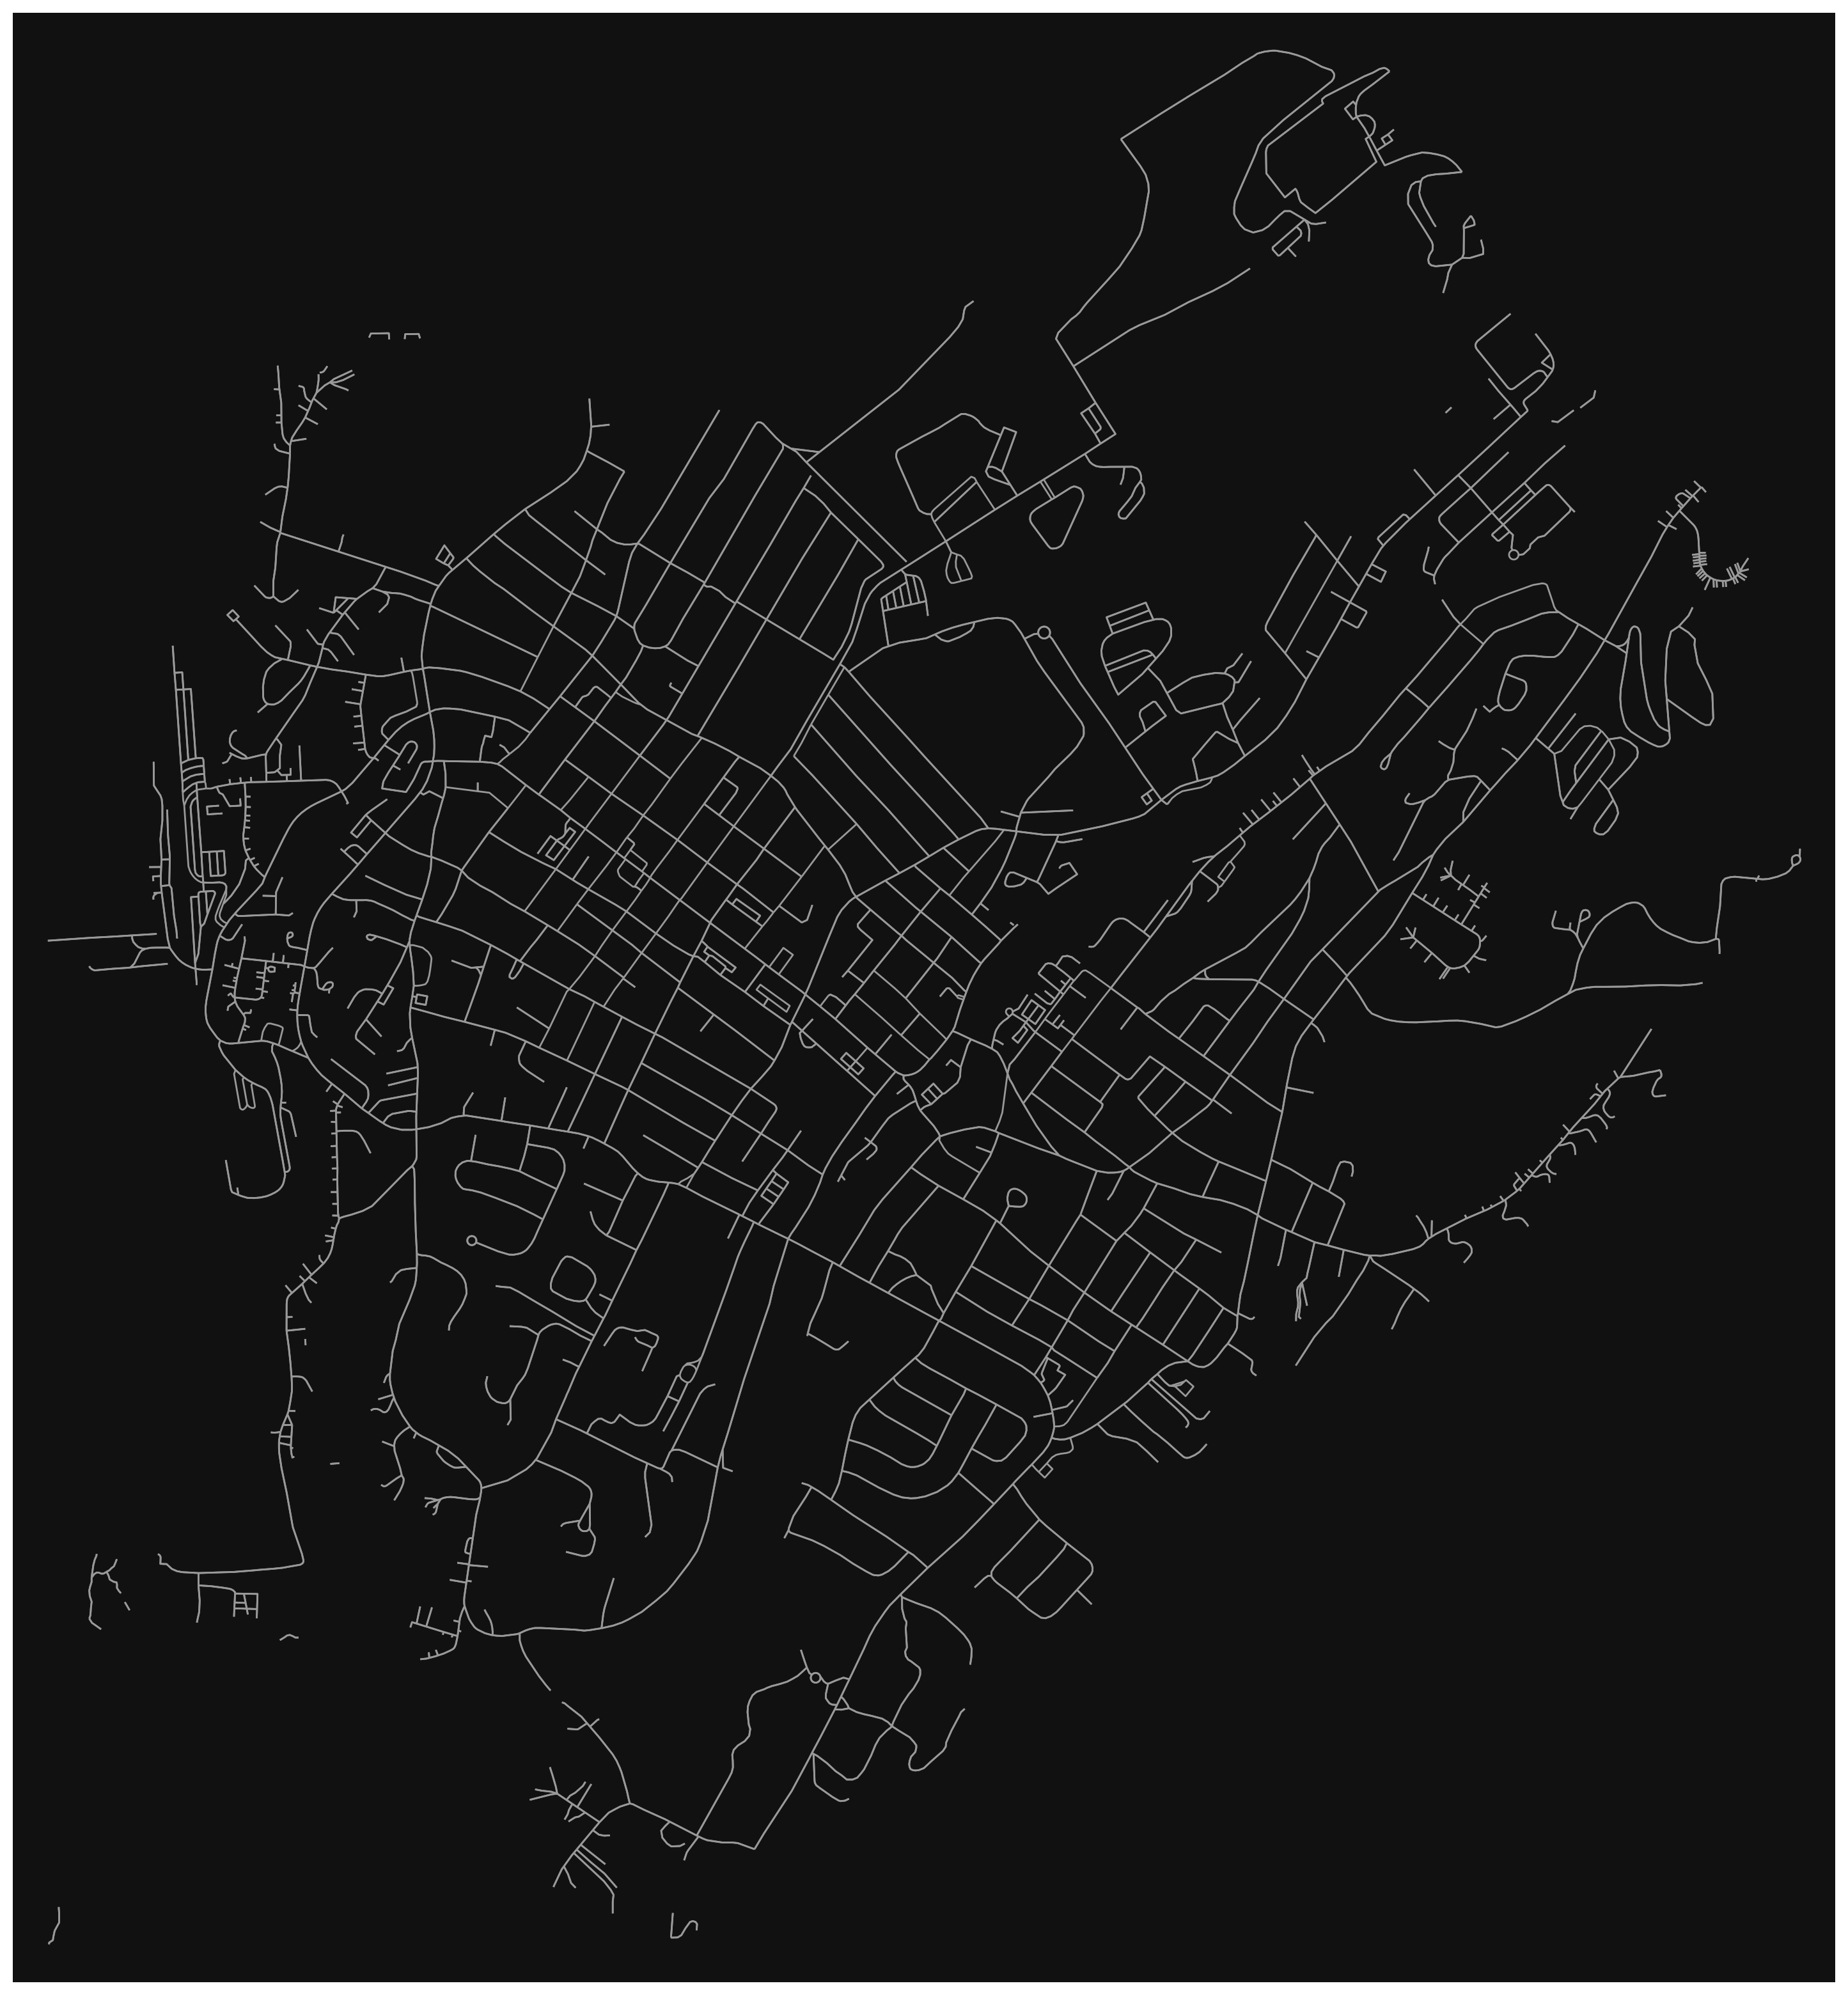

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [6]:
ox.plot.plot_graph(W, figsize=(20,20), node_size=0)

In [7]:
any_given_edge = list(W.edges(data=True))[0]
any_given_edge

(261509145,
 261509152,
 {'osmid': 24138532,
  'name': 'Academy Street',
  'highway': 'residential',
  'oneway': False,
  'reversed': False,
  'length': 145.24200000000002,
  'geometry': <LINESTRING (-73.979 41.506, -73.979 41.506, -73.978 41.506, -73.978 41.505,...>})

In [8]:
list(any_given_edge[2]["geometry"].coords)

[(-73.9794824, 41.5059318),
 (-73.978938, 41.505735),
 (-73.978326, 41.505531),
 (-73.9779449, 41.5054455),
 (-73.977876, 41.50543)]

In [9]:
p = Point(any_given_edge[2]["geometry"].coords[1])
p = Point(p.x + 0.001, p.y)

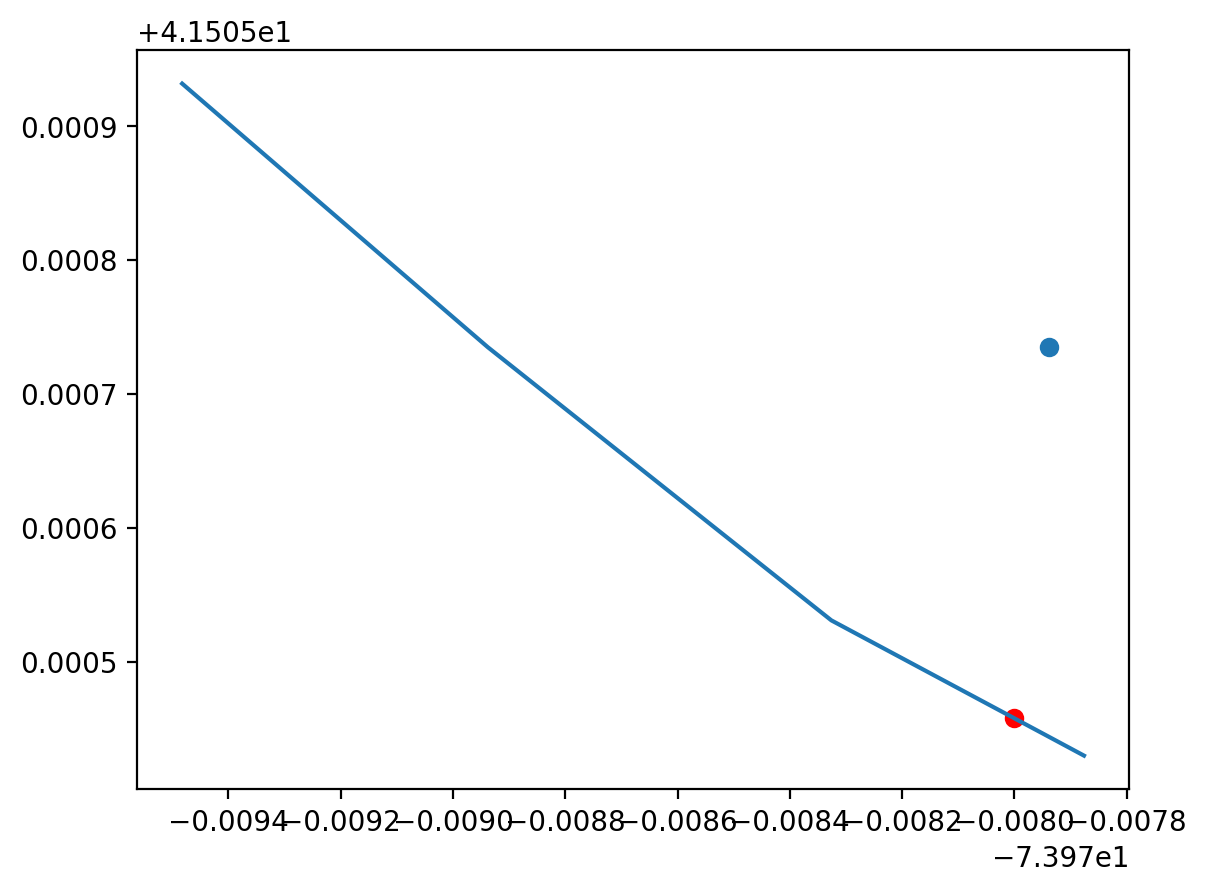

In [10]:
plt.scatter(p.x, p.y)
plt.plot(*any_given_edge[2]["geometry"].coords.xy)
proj = any_given_edge[2]["geometry"].interpolate(any_given_edge[2]["geometry"].project(p, normalized=True), normalized=True)
plt.scatter(proj.x, proj.y, label="Projected - Shapely", c='red')

In [11]:
proj.xy

(array('d', [-73.97800016768997]), array('d', [41.50545789933742]))

In [12]:
from metroscore.utils import *

In [13]:
merge_node_to_edge(node=p, edge=any_given_edge).xy

(array('d', [-73.97800016768997]), array('d', [41.50545789933742]))

In [14]:
list(G.nodes(data=True))[0]

(261509145,
 {'y': 41.5059318,
  'x': -73.9794824,
  'highway': 'turning_circle',
  'street_count': 1})

In [18]:
G_proj = ox.projection.project_graph(G, to_latlong=True)
W_proj = ox.projection.project_graph(W, to_latlong=True)

In [21]:
G_proj.graph['crs'] == W_proj.graph['crs']

True

In [46]:
Xs = []
Ys = []
for _id, node in G_proj.nodes(data=True):
    print(_id, node)
    if (node['x'] != node['lon']) or (node['y'] != node['lat']):
        print("Mismatched location!")
    Xs.append(node['x'])
    Ys.append(node['y'])

261509145 {'y': 41.5059318, 'x': -73.9794824, 'highway': 'turning_circle', 'street_count': 1, 'lon': -73.9794824, 'lat': 41.5059318}
261509152 {'y': 41.50543, 'x': -73.977876, 'street_count': 3, 'lon': -73.977876, 'lat': 41.50543}
261855051 {'y': 41.5050907, 'x': -73.9780389, 'street_count': 3, 'lon': -73.9780389, 'lat': 41.5050907}
261835049 {'y': 41.5063306, 'x': -73.9776159, 'highway': 'traffic_signals', 'street_count': 4, 'lon': -73.9776159, 'lat': 41.5063306}
261517184 {'y': 41.4980188, 'x': -73.9718302, 'street_count': 3, 'lon': -73.9718302, 'lat': 41.4980188}
261829830 {'y': 41.498329, 'x': -73.9726799, 'street_count': 3, 'lon': -73.9726799, 'lat': 41.498329}
261915390 {'y': 41.496574, 'x': -73.97276, 'street_count': 3, 'lon': -73.97276, 'lat': 41.496574}
10979240465 {'y': 41.4994449, 'x': -73.9709188, 'street_count': 3, 'lon': -73.9709188, 'lat': 41.4994449}
261519631 {'y': 41.511838, 'x': -73.982081, 'street_count': 1, 'lon': -73.982081, 'lat': 41.511838}
261848698 {'y': 41.51

In [29]:
len(Xs), len(Ys)

(501, 501)

In [45]:
list(dict(G.nodes(data=True)).values())[0]

{'y': 41.5059318,
 'x': -73.9794824,
 'highway': 'turning_circle',
 'street_count': 1}

In [34]:
nn, dist = ox.distance.nearest_nodes(G=W_proj, X=Xs, Y=Ys, return_dist=True)

In [41]:
dict(zip(G_proj.nodes, zip(nn, dist)))

{261509145: (261509145, 0.0),
 261509152: (261509152, 0.0),
 261855051: (261855051, 0.0),
 261835049: (261835049, 0.0),
 261517184: (261517184, 0.0),
 261829830: (261829830, 0.0),
 261915390: (261915390, 0.0),
 10979240465: (10979240465, 0.0),
 261519631: (261519631, 0.0),
 261848698: (261848698, 0.0),
 261526707: (7811462788, 41.604853502260134),
 3659100605: (3659100605, 0.0),
 261527681: (261527681, 0.0),
 261527699: (261527699, 0.0),
 261854999: (261854999, 0.0),
 261847038: (261847038, 0.0),
 261528445: (261528445, 0.0),
 261824315: (261824315, 0.0),
 261538925: (10291413995, 39.55947818805949),
 261950507: (261950507, 0.0),
 261544065: (261544065, 0.0),
 261544073: (261544073, 0.0),
 261880559: (261880559, 0.0),
 261880539: (261880539, 0.0),
 261920625: (261920625, 0.0),
 261548361: (261548361, 0.0),
 261548363: (261548363, 0.0),
 261926950: (261926950, 0.0),
 8810464202: (8810464202, 0.0),
 261548422: (261548422, 0.0),
 261803586: (261803586, 0.0),
 261792248: (261792248, 0.0),


In [44]:
get_node_to_node_mapping(G, W)

{261509145: (261509145, 0.0),
 261509152: (261509152, 0.0),
 261855051: (261855051, 0.0),
 261835049: (261835049, 0.0),
 261517184: (261517184, 0.0),
 261829830: (261829830, 0.0),
 261915390: (261915390, 0.0),
 10979240465: (10979240465, 0.0),
 261519631: (261519631, 0.0),
 261848698: (261848698, 0.0),
 261526707: (7811462788, 41.604853502260134),
 3659100605: (3659100605, 0.0),
 261527681: (261527681, 0.0),
 261527699: (261527699, 0.0),
 261854999: (261854999, 0.0),
 261847038: (261847038, 0.0),
 261528445: (261528445, 0.0),
 261824315: (261824315, 0.0),
 261538925: (10291413995, 39.55947818805949),
 261950507: (261950507, 0.0),
 261544065: (261544065, 0.0),
 261544073: (261544073, 0.0),
 261880559: (261880559, 0.0),
 261880539: (261880539, 0.0),
 261920625: (261920625, 0.0),
 261548361: (261548361, 0.0),
 261548363: (261548363, 0.0),
 261926950: (261926950, 0.0),
 8810464202: (8810464202, 0.0),
 261548422: (261548422, 0.0),
 261803586: (261803586, 0.0),
 261792248: (261792248, 0.0),
